In [1]:
import sys
# sys.path.append('/content/ML_Forex_Forecasting')
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import mean_squared_error
import numpy as np
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.statespace.tools import diff
import pickle
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

# Load the Data

In [2]:
gbpchf = pd.read_csv("./GBPCHF=X.csv", parse_dates=['Date'])
gbpchf = gbpchf[['Date', 'Close']]

gold_prices = pd.read_csv("./GC=F.csv", parse_dates=['Date'])
gold_prices = gold_prices[['Date', 'Close']]
gold_prices.rename(columns = {'Close':'Gold_Price'}, inplace = True)

SSMI = pd.read_csv("./SSMI.csv", parse_dates=['Date'])
SSMI = SSMI[['Date', 'Close']]
SSMI.rename(columns = {'Close':'SSMI'}, inplace = True)

FTSE = pd.read_csv("./FTSE.csv", parse_dates=['Date'])
FTSE = FTSE[['Date', 'Close']]
FTSE.rename(columns = {'Close':'FTSE'}, inplace = True)

gbpchf = gbpchf.merge(gold_prices, on='Date')
gbpchf = gbpchf.merge(FTSE, on='Date')
gbpchf = gbpchf.merge(SSMI, on='Date')

print(f"GBP/CHF: {gbpchf.shape}")
display(gbpchf)

GBP/CHF: (245, 5)


,Date,Close,Gold_Price,FTSE,SSMI
0,2022-12-09,1.14492,1798.099976,7476.600098,11068.299805
1,2022-12-12,1.14417,1780.500000,7446.000000,11033.639648
2,2022-12-13,1.14800,1813.900024,7502.899902,11136.620117
3,2022-12-14,1.14769,1807.500000,7495.899902,11160.690430
4,2022-12-15,1.14773,1777.199951,7426.200195,10880.139648
...,...,...,...,...,...
240,2023-12-04,1.10319,2024.099976,7513.000000,10952.440430
241,2023-12-05,1.10225,2018.500000,7489.799805,10964.809570
242,2023-12-06,1.10193,2030.500000,7515.399902,11001.620117
243,2023-12-07,1.09828,2029.900024,7513.700195,10968.099609


In [3]:
from statsmodels.tsa.stattools import grangercausalitytests

max_lag = 15

test_result = grangercausalitytests(gbpchf[['Close', 'Gold_Price']], max_lag, verbose=True)

for lag in range(1, max_lag + 1):
    f_statistic = test_result[lag][0]['params_ftest'][0]
    p_value = test_result[lag][0]['params_ftest'][1]


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0787  , p=0.7793  , df_denom=241, df_num=1
ssr based chi2 test:   chi2=0.0797  , p=0.7778  , df=1
likelihood ratio test: chi2=0.0796  , p=0.7778  , df=1
parameter F test:         F=0.0787  , p=0.7793  , df_denom=241, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5085  , p=0.6021  , df_denom=238, df_num=2
ssr based chi2 test:   chi2=1.0383  , p=0.5950  , df=2
likelihood ratio test: chi2=1.0361  , p=0.5957  , df=2
parameter F test:         F=0.5085  , p=0.6021  , df_denom=238, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.4785  , p=0.6975  , df_denom=235, df_num=3
ssr based chi2 test:   chi2=1.4783  , p=0.6873  , df=3
likelihood ratio test: chi2=1.4738  , p=0.6883  , df=3
parameter F test:         F=0.4785  , p=0.6975  , df_denom=235, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.3548  , p=0.8406  

In [4]:
from statsmodels.tsa.stattools import grangercausalitytests

max_lag = 15

test_result = grangercausalitytests(gbpchf[['Close', 'FTSE']], max_lag, verbose=True)

for lag in range(1, max_lag + 1):
    f_statistic = test_result[lag][0]['params_ftest'][0]
    p_value = test_result[lag][0]['params_ftest'][1]


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2585  , p=0.6117  , df_denom=241, df_num=1
ssr based chi2 test:   chi2=0.2617  , p=0.6090  , df=1
likelihood ratio test: chi2=0.2615  , p=0.6091  , df=1
parameter F test:         F=0.2585  , p=0.6117  , df_denom=241, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.6308  , p=0.0280  , df_denom=238, df_num=2
ssr based chi2 test:   chi2=7.4143  , p=0.0245  , df=2
likelihood ratio test: chi2=7.3034  , p=0.0259  , df=2
parameter F test:         F=3.6308  , p=0.0280  , df_denom=238, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.2595  , p=0.0822  , df_denom=235, df_num=3
ssr based chi2 test:   chi2=6.9804  , p=0.0725  , df=3
likelihood ratio test: chi2=6.8816  , p=0.0758  , df=3
parameter F test:         F=2.2595  , p=0.0822  , df_denom=235, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.2658  , p=0.0125  

In [5]:
from statsmodels.tsa.stattools import grangercausalitytests

max_lag = 15

test_result = grangercausalitytests(gbpchf[['Close', 'SSMI']], max_lag, verbose=True)

for lag in range(1, max_lag + 1):
    f_statistic = test_result[lag][0]['params_ftest'][0]
    p_value = test_result[lag][0]['params_ftest'][1]


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5779  , p=0.2103  , df_denom=241, df_num=1
ssr based chi2 test:   chi2=1.5976  , p=0.2062  , df=1
likelihood ratio test: chi2=1.5924  , p=0.2070  , df=1
parameter F test:         F=1.5779  , p=0.2103  , df_denom=241, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.8242  , p=0.4398  , df_denom=238, df_num=2
ssr based chi2 test:   chi2=1.6830  , p=0.4311  , df=2
likelihood ratio test: chi2=1.6772  , p=0.4323  , df=2
parameter F test:         F=0.8242  , p=0.4398  , df_denom=238, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.6957  , p=0.5555  , df_denom=235, df_num=3
ssr based chi2 test:   chi2=2.1492  , p=0.5420  , df=3
likelihood ratio test: chi2=2.1397  , p=0.5439  , df=3
parameter F test:         F=0.6957  , p=0.5555  , df_denom=235, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.7418  , p=0.5644  

parameter F test:         F=1.0679  , p=0.3867  , df_denom=220, df_num=8

Granger Causality
number of lags (no zero) 9
ssr based F test:         F=0.9828  , p=0.4552  , df_denom=217, df_num=9
ssr based chi2 test:   chi2=9.6194  , p=0.3822  , df=9
likelihood ratio test: chi2=9.4285  , p=0.3987  , df=9
parameter F test:         F=0.9828  , p=0.4552  , df_denom=217, df_num=9

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=0.6668  , p=0.7545  , df_denom=214, df_num=10
ssr based chi2 test:   chi2=7.3223  , p=0.6947  , df=10
likelihood ratio test: chi2=7.2105  , p=0.7054  , df=10
parameter F test:         F=0.6668  , p=0.7545  , df_denom=214, df_num=10

Granger Causality
number of lags (no zero) 11
ssr based F test:         F=0.6676  , p=0.7682  , df_denom=211, df_num=11
ssr based chi2 test:   chi2=8.1445  , p=0.7003  , df=11
likelihood ratio test: chi2=8.0060  , p=0.7128  , df=11
parameter F test:         F=0.6676  , p=0.7682  , df_denom=211, df_num=11

Granger Ca

In [6]:
from statsmodels.tsa.stattools import grangercausalitytests

max_lag = 15

test_result = grangercausalitytests(gbpchf[['FTSE', 'Close']], max_lag, verbose=True)

for lag in range(1, max_lag + 1):
    f_statistic = test_result[lag][0]['params_ftest'][0]
    p_value = test_result[lag][0]['params_ftest'][1]


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1631  , p=0.2819  , df_denom=241, df_num=1
ssr based chi2 test:   chi2=1.1776  , p=0.2778  , df=1
likelihood ratio test: chi2=1.1748  , p=0.2784  , df=1
parameter F test:         F=1.1631  , p=0.2819  , df_denom=241, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.1272  , p=0.3257  , df_denom=238, df_num=2
ssr based chi2 test:   chi2=2.3018  , p=0.3164  , df=2
likelihood ratio test: chi2=2.2910  , p=0.3181  , df=2
parameter F test:         F=1.1272  , p=0.3257  , df_denom=238, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.8301  , p=0.4785  , df_denom=235, df_num=3
ssr based chi2 test:   chi2=2.5645  , p=0.4637  , df=3
likelihood ratio test: chi2=2.5510  , p=0.4661  , df=3
parameter F test:         F=0.8301  , p=0.4785  , df_denom=235, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.6198  , p=0.6488  

## Dickey-Fuller Test

In [7]:
def dickey_fuller_test(df,var):
    result = adfuller(df[var].values)
    #Extracting the values from the results:
    print(f"Dickey-Fuller test for feature: {var}")

    print('Test Statistic: %f' % result[0])

    print('p-value: %f' % result[1])

    print('Critical Values:')

    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    if result[0] < result[4]["5%"]:
        print ("Reject H0 - Time Series is Stationary")
    else:
        print ("Failed to Reject H0 - Time Series is Non-Stationary")

In [8]:
dickey_fuller_test(gbpchf,'Close')
print("")
dickey_fuller_test(gbpchf,'Gold_Price')
print("")
dickey_fuller_test(gbpchf,'FTSE')
print("")
dickey_fuller_test(gbpchf,'SSMI')

Dickey-Fuller test for feature: Close
Test Statistic: -2.974180
p-value: 0.037377
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573
Reject H0 - Time Series is Stationary

Dickey-Fuller test for feature: Gold_Price
Test Statistic: -3.423780
p-value: 0.010174
Critical Values:
	1%: -3.458
	5%: -2.874
	10%: -2.573
Reject H0 - Time Series is Stationary

Dickey-Fuller test for feature: FTSE
Test Statistic: -2.850338
p-value: 0.051435
Critical Values:
	1%: -3.458
	5%: -2.874
	10%: -2.573
Failed to Reject H0 - Time Series is Non-Stationary

Dickey-Fuller test for feature: SSMI
Test Statistic: -2.286627
p-value: 0.176317
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573
Failed to Reject H0 - Time Series is Non-Stationary


In [9]:
# Perform differencing
diff_data = diff(gbpchf.set_index('Date'), k_diff=1)

In [10]:
dickey_fuller_test(diff_data,'Close')
print("")
dickey_fuller_test(diff_data,'Gold_Price')
print("")
dickey_fuller_test(diff_data,'FTSE')
print("")
dickey_fuller_test(diff_data,'SSMI')

Dickey-Fuller test for feature: Close
Test Statistic: -16.087792
p-value: 0.000000
Critical Values:
	1%: -3.458
	5%: -2.874
	10%: -2.573
Reject H0 - Time Series is Stationary

Dickey-Fuller test for feature: Gold_Price
Test Statistic: -4.827826
p-value: 0.000048
Critical Values:
	1%: -3.458
	5%: -2.874
	10%: -2.573
Reject H0 - Time Series is Stationary

Dickey-Fuller test for feature: FTSE
Test Statistic: -9.724298
p-value: 0.000000
Critical Values:
	1%: -3.458
	5%: -2.874
	10%: -2.573
Reject H0 - Time Series is Stationary

Dickey-Fuller test for feature: SSMI
Test Statistic: -15.827505
p-value: 0.000000
Critical Values:
	1%: -3.458
	5%: -2.874
	10%: -2.573
Reject H0 - Time Series is Stationary


# Autocorrelograms

In [11]:
def plot_autocorrelograms(df,var):
    plot_acf(df[var].dropna(),lags=20)
    plt.title(f"Autocorrelation for {var}")
    plot_pacf(df[var].dropna(),lags=20)
    plt.title(f"Partial Autocorrelation for {var}")

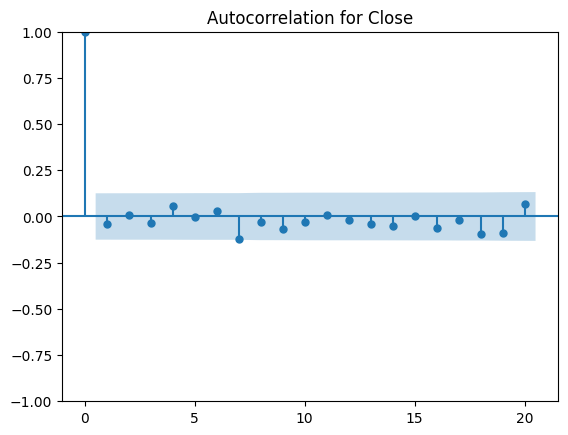

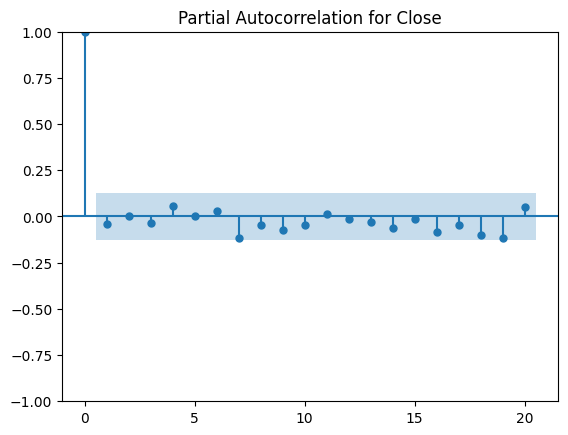

In [12]:
plot_autocorrelograms(diff_data,'Close')

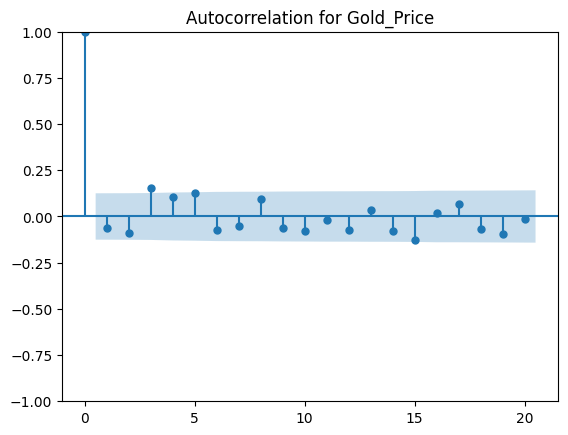

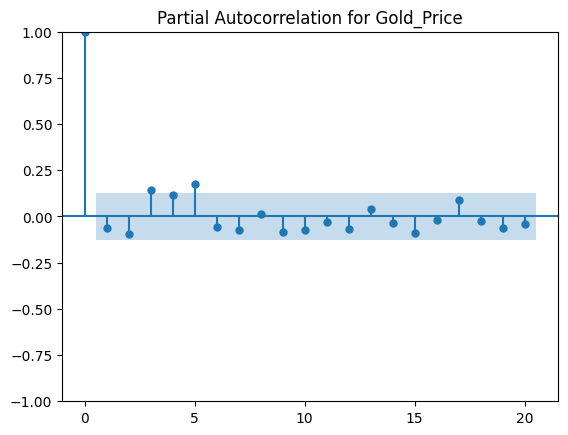

In [13]:
plot_autocorrelograms(diff_data,'Gold_Price')

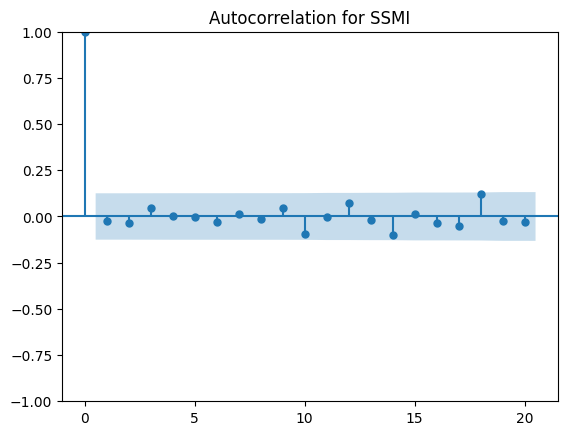

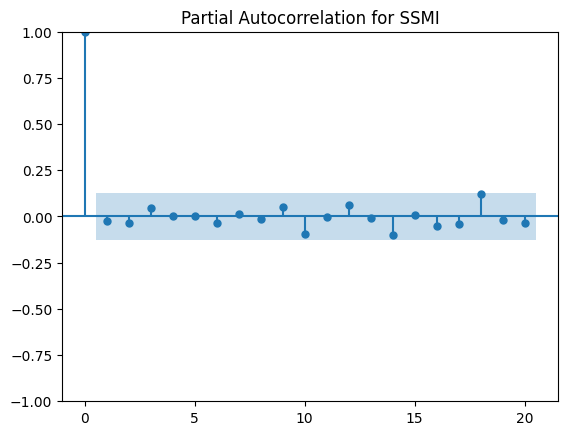

In [14]:
plot_autocorrelograms(diff_data,'SSMI')

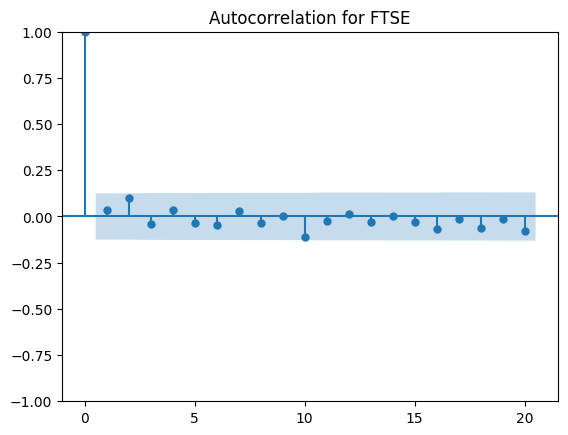

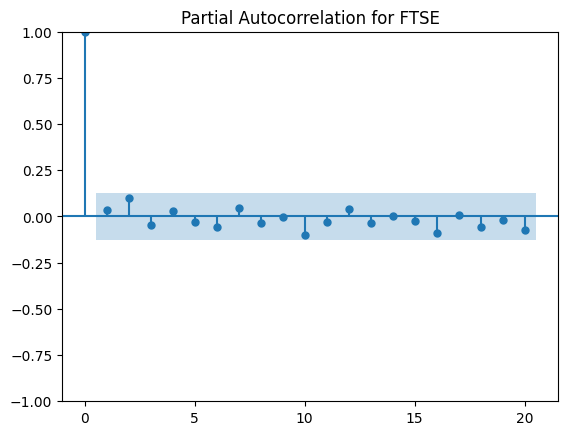

In [15]:
plot_autocorrelograms(diff_data,'FTSE')

# Model Training

In [16]:
data = gbpchf.copy()
df = data.dropna()

# train_size = int(len(df) * 0.8)
# train, test = df[:train_size], df[train_size:]
train, test = df[:-5], df[-5:]

data = train[['Close','Gold_Price','FTSE','SSMI']]

diff_data = diff(data, k_diff=1)
diff_test = diff(df[-6:], k_diff=1)

p = np.arange(1,11)
q = np.arange(1,11)
models = []
orders = []
MSEs = []
for i in p:
    for j in q:
        orders.append((i,j))
        model = VARMAX(endog=diff_data[['Close','FTSE']], order=(i,j), mle_regression = True, filter_concentrated = True, initialization='approximate_diffuse', exog=diff_data[['Gold_Price','SSMI']])
        model_fit = model.fit(disp=False)
        pred = pd.DataFrame()
        pred['prediction'] = data.iloc[-1]['Close'] + np.cumsum(model_fit.forecast(5, exog=diff_test[['FTSE','SSMI']]).reset_index(drop=True).Close)
        pred['observed'] = test.reset_index(drop=True).Close
        models.append(model_fit)
        MSEs.append(np.mean((pred['prediction'].values-pred['observed'].values)**2))

/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models

In [17]:
MSEs

[2.292572039559161e-06,
 2.4903309921645928e-06,
 4.37704129534011e-06,
 4.8278672332980235e-06,
 4.488445126556979e-06,
 7.969206546808585e-06,
 6.830389807050685e-06,
 5.050438420413108e-06,
 4.739012519384907e-06,
 4.485867357609811e-06,
 2.3900359879624524e-06,
 2.4782275783397527e-06,
 3.817270051809485e-06,
 3.892223326782985e-06,
 4.1386321705938346e-06,
 6.906576082210118e-06,
 6.590507664487175e-06,
 4.839287998978523e-06,
 5.062273372921152e-06,
 5.485942134014859e-06,
 4.2275467849092755e-06,
 4.080673518640825e-06,
 3.7189998363484182e-06,
 5.295543702545258e-06,
 5.102962190815769e-06,
 5.809417185986144e-06,
 6.492754519475586e-06,
 6.074247013513747e-06,
 8.379010207820646e-06,
 1.0072393029011435e-05,
 8.295762081964617e-06,
 8.652390780819375e-06,
 8.347997640027513e-06,
 9.222934691365467e-06,
 8.43448536794701e-06,
 9.639967481194385e-06,
 9.548045551367166e-06,
 9.274735457756226e-06,
 1.2977362763882016e-05,
 1.4068904325827074e-05,
 8.353087581677428e-06,
 7.96136

In [18]:
idx = np.argmin(MSEs)
print(orders[idx])
model_fit = models[idx]

(1, 1)


/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


Text(0.5, 1.0, 'MSE = 1.9925301431904818e-06')

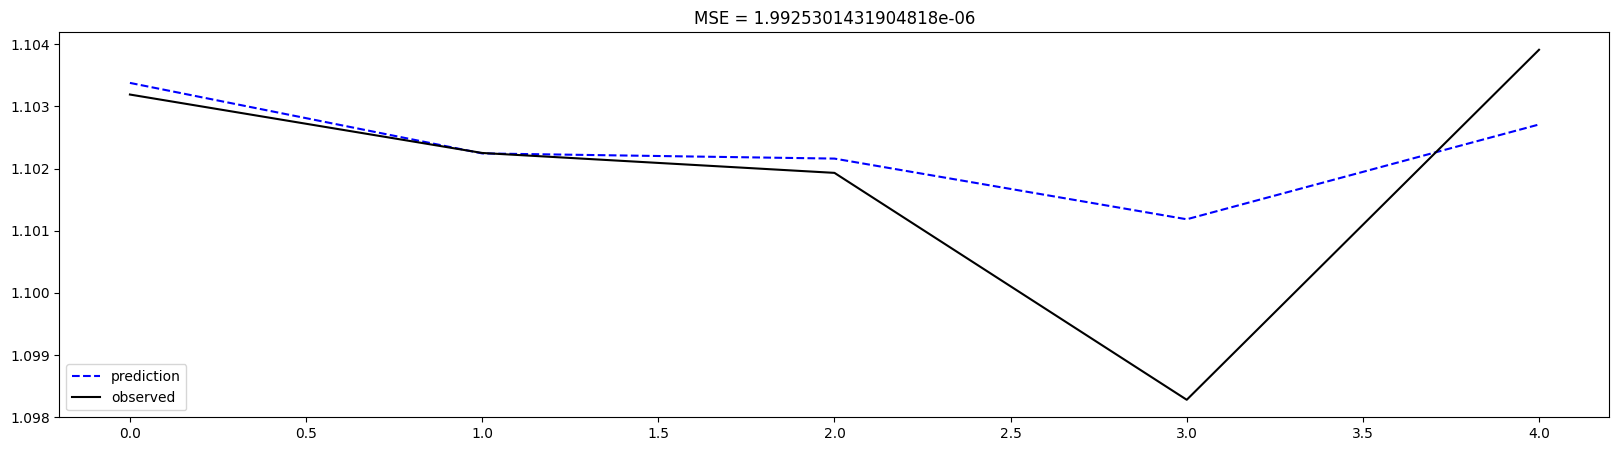

In [19]:
# plot prediction vs observed
pred = pd.DataFrame()
pred['prediction'] = data.iloc[-1]['Close'] + np.cumsum(model_fit.forecast(5, exog=diff_test[['Gold_Price','SSMI']]).reset_index(drop=True).Close)
pred['observed'] = test.reset_index(drop=True).Close

pred.plot(figsize=(20,5),title='prediction vs observed',color=['blue','black'],style=['--','-'])
plt.title(f"MSE = {np.mean((pred['prediction'].values-pred['observed'].values)**2)}")

In [20]:
print(pred)

   prediction  observed
0    1.103377   1.10319
1    1.102243   1.10225
2    1.102160   1.10193
3    1.101184   1.09828
4    1.102708   1.10391


In [21]:
# Train all the data using the best p and q parameters
diff_data_all = diff(gbpchf, k_diff=1)
model = VARMAX(endog=diff_data_all[['Close', 'FTSE']], order=orders[idx], mle_regression = True, filter_concentrated = True, initialization='approximate_diffuse', exog=diff_data_all[['Gold_Price','SSMI']])
model_fit_final = model.fit(disp=False)

/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [22]:
forecast_vals = gbpchf.iloc[-1]['Close'] + np.cumsum(model_fit_final.forecast(5, exog=diff_test[['Gold_Price','SSMI']]).reset_index(drop=True).Close)
print(forecast_vals)

0    1.102941
1    1.101840
2    1.101787
3    1.100783
4    1.102293
Name: Close, dtype: float64


/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


In [23]:
forecast_vals.values.tofile("./predictions_gbpchf.csv", sep=',')

/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


Text(0.5, 1.0, 'MSE = 2.6157071723181018e-05')

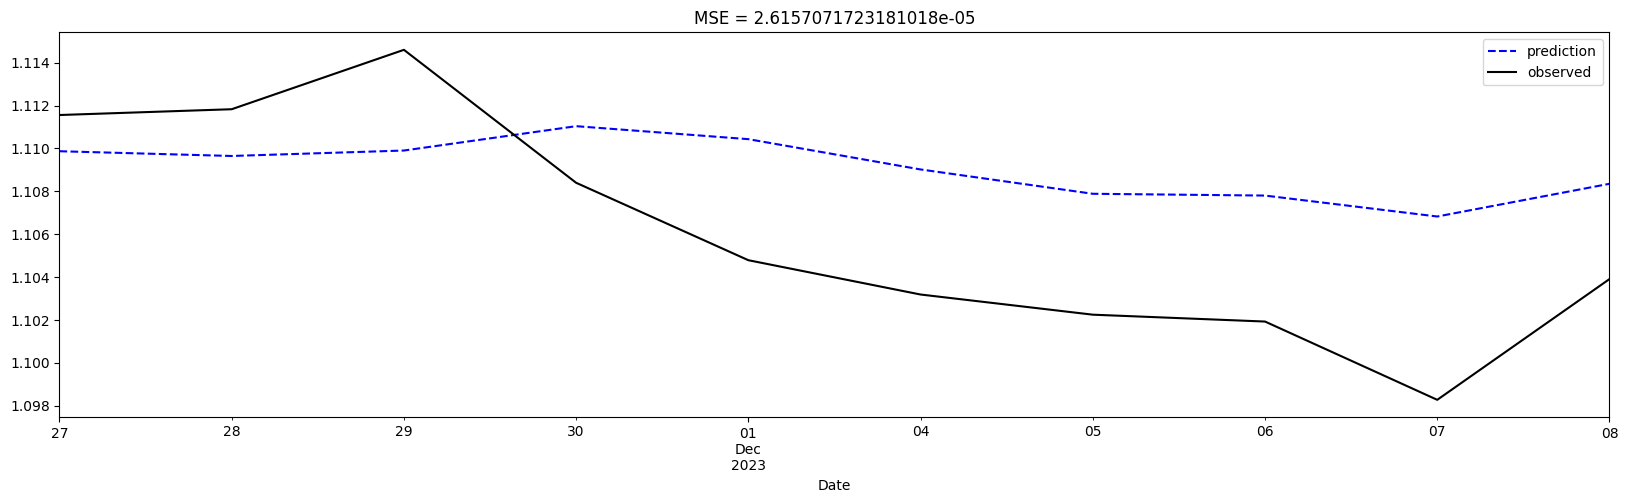

In [27]:
# plot prediction vs observed (last 2 weeks)
pred = pd.DataFrame()
temp = data.iloc[0]['Close'] + np.cumsum(model_fit.predict(start=0, end=diff_data.shape[0]+5-1, exog=diff_test[['Gold_Price','SSMI']]).Close)
pred['prediction'] = temp[-10:].reset_index(drop=True)
pred['observed'] = gbpchf.iloc[-10:]['Close'].reset_index(drop=True)
pred['Date'] = gbpchf.iloc[-10:]['Date'].reset_index(drop=True)

pred.plot(figsize=(20,5),title='prediction vs observed',color=['blue','black'],style=['--','-'], x='Date')
plt.title(f"MSE = {np.mean((pred['prediction'].values-pred['observed'].values)**2)}")


In [24]:
import pickle
pickle.dump(model_fit, open("./gbpchf_models/model_9_9_best.pkl","wb"))

FileNotFoundError: [Errno 2] No such file or directory: './gbpchf_models/model_9_9_best.pkl'